In [186]:
from numpy import *
from matplotlib import pyplot as plt
import operator

## prepare data set and make plot

run code below.

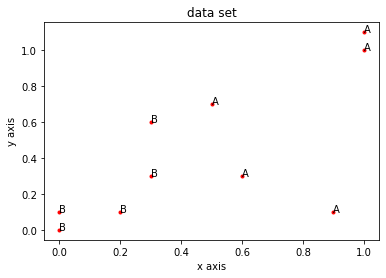

In [215]:
dset = array([
    [1,1],
    [1,1.1],
    [0,0],
    [0,0.1],
    [0.3,0.6],
    [0.5,0.7],
    [0.2,0.1],
    [0.6,0.3],
    [0.9,0.1],
    [0.3,0.3],
])
labels = ['A', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'A', 'B']
dset

plt.title('data set')
plt.xlabel('x axis')
plt.ylabel('y axis')
xaxis = dset[:,0]
yasix = dset[:,1]
plt.plot(xaxis, yasix, 'r.')
for i in range(len(xaxis)):
    plt.text(xaxis[i], yasix[i], labels[i])
plt.show()


## kNN algorithm

### config kNN args

In [220]:
k=3  # numbers of nearest neighbor
p = array([0.5, 0.8])   # sample for predicated

In [221]:
dist_list = []
for i in range(len(dset)):
    # 欧式距离公式
    distance = sqrt(sum((dset[i]-p)**2))
    dist_list.append([distance, labels[i]])

dist_list = array(dist_list)
sorted_dist_list = dist_list[dist_list[:,0].argsort()]

tmp = {}
for i in range(k):
    item = sorted_dist_list[i]
    dis = item[0]
    label = item[1]
    tmp[label] = tmp.get(label, 0) + 1

sorted_kNN_set = sorted(tmp.items(), key=operator.itemgetter(1), reverse=True)

print('nearest neighbor set:', sorted_kNN_set)
print('nearest neighbor label: %s, count: %d' % sorted_kNN_set[0])


nearest neighbor set: [('A', 2), ('B', 1)]
nearest neighbor label: A, count: 2


## Iris data

In [49]:
from pandas import read_csv

In [55]:
iris_set = array(read_csv('./iris.data'))



